In [1]:
import shap
import pandas as pd
import pickle
import os

In [2]:
os.chdir('../')

In [3]:
X = pd.read_csv('data/processed/dataset.csv')

In [4]:
with open('models/rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [5]:
X = X[rf_model.feature_names_in_]

In [6]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

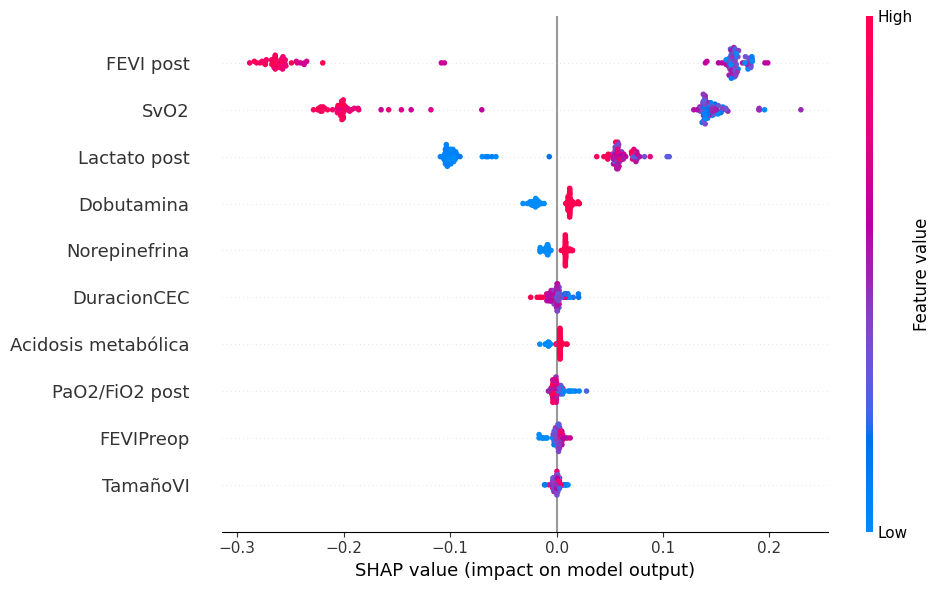

In [7]:
shap.summary_plot(shap_values[1], X, plot_type='dot', show=False, plot_size=[10,6])

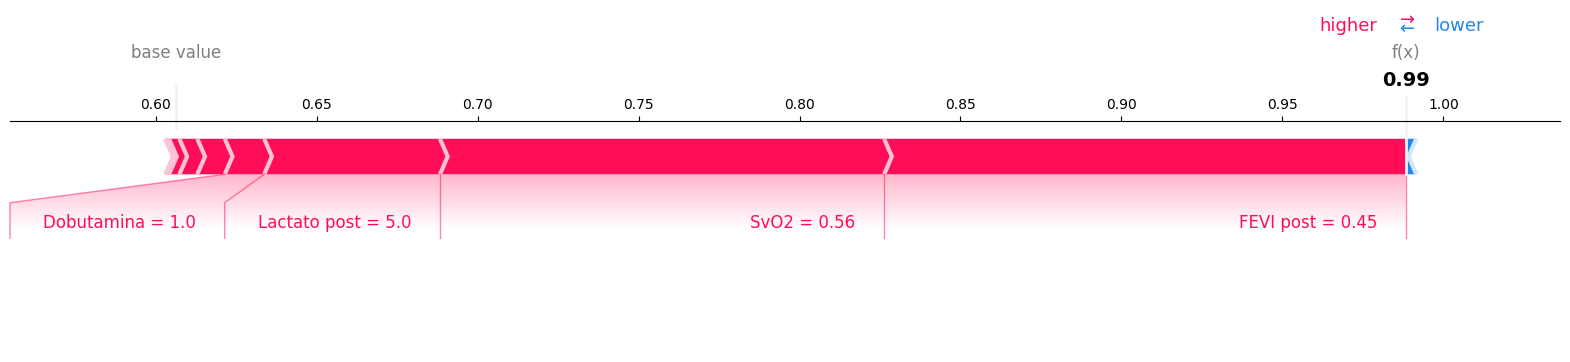

In [26]:
shap.plots.force(explainer.expected_value[1], shap_values[1][0], X.iloc[0], matplotlib=True)

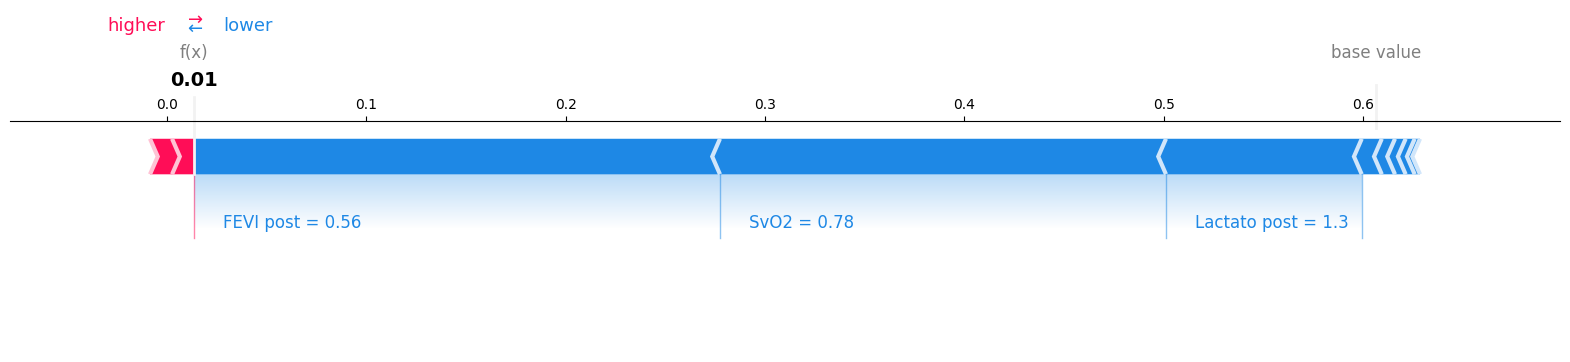

In [29]:
shap.plots.force(explainer.expected_value[1], shap_values[1][1], X.iloc[1], matplotlib=True)

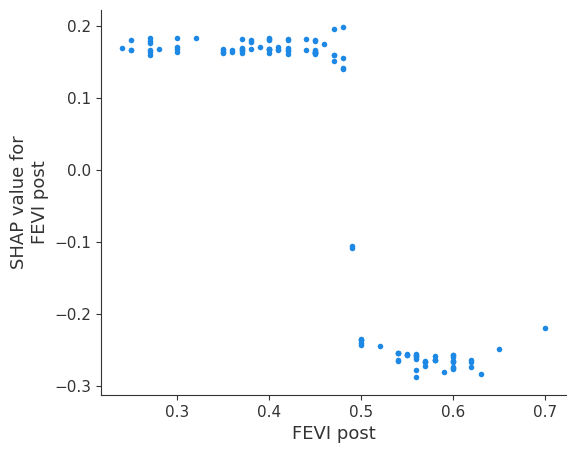

In [9]:
shap.dependence_plot('FEVI post', shap_values[1],
                     X, interaction_index=None)

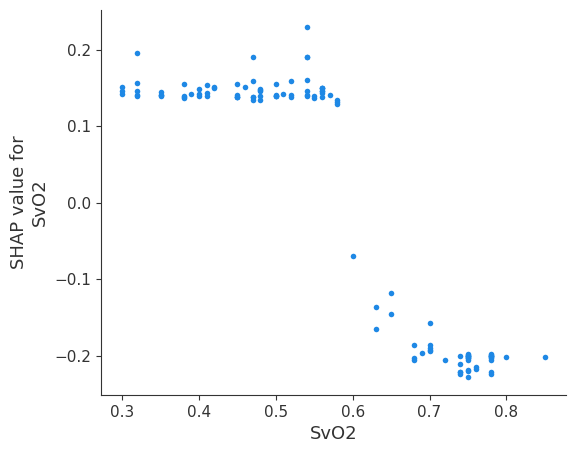

In [10]:
shap.dependence_plot('SvO2', shap_values[1],
                     X, interaction_index=None)

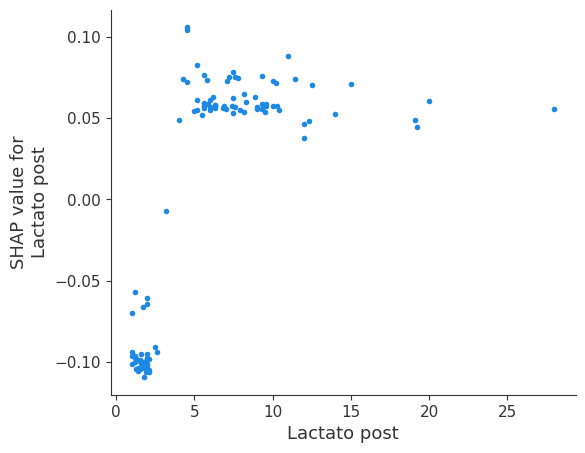

In [11]:
shap.dependence_plot('Lactato post', shap_values[1],
                     X, interaction_index=None)